Alex Beckwith

Math 839 - Fall 21

HW5

As per convention, the library imports are stated at the beginning of the file.

If I were being particular about professional best practice, I would import all of the objects and functions that I am using via absolute reference instead of importing the entire package.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.stats.outliers_influence as oi

Problem 1a. Fit the straight-line model. Make scatterplot, summary stats, and residual plots. State conclusions about adequacy.

I begin by using pandas to import the csv as a dataframe assigned to the variable vapor.

The method "head" allows us to preview the data we'll be using.

In [2]:
vapor = pd.read_csv("/Users/Fr333y3d3a/Documents/School/952986478/MATH839 Applied Regression Analysis/hw5/Hwk5Prob1.csv")
vapor.head()

,temp,vapor
0,273,4.6
1,283,9.2
2,293,17.5
3,303,31.8
4,313,55.3


Since we're making a linear model, it'll be useful to have a constant term. 

We'll also separate the regressors from the term being predicted. 

In [3]:
vapor["const"] = 1
X = vapor.loc[:,["temp","const"]]
y = vapor.loc[:,"vapor"]

Here is the requested scatterplot. That doesn't look linear!

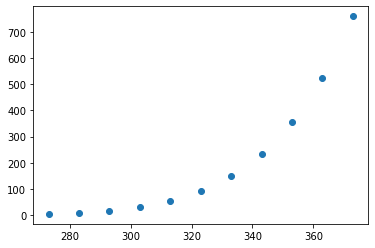

In [4]:
plt.scatter(vapor["temp"],vapor["vapor"])
plt.show()

Our correlation coefficient doesn't reflect how strong of a relationship the scatterplot appears to show. 

The residual plots provide further evidence for a nonlinear relationship.

In [5]:
model = sm.OLS(y,X).fit()
model.summary()

/Users/Fr333y3d3a/miniconda3/envs/math839/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  vapor   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     35.57
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           0.000212
Time:                        23:06:36   Log-Likelihood:                -66.942
No. Observations:                  11   AIC:                             137.9
Df Residuals:                       9   BIC:                             138.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp           6.6855      1.121      5.964      0.000       4.150       9.221
const      -1956.2585    363.807     -5.377      0.000   -2779.248   -1133.269
==============================================================================
Omnibus:                        1.564   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.056
Skew:                           0.694   Prob(JB):                        0.590
Kurtosis:                       2.386   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Actual by Predicted')

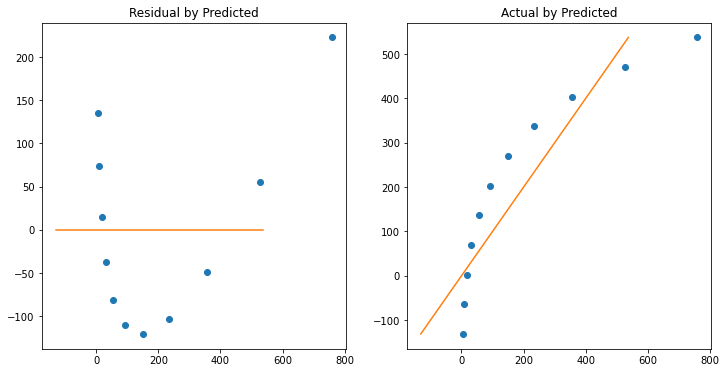

In [6]:
#Residuals and predicted values
resid = model.resid
pred = model.predict(X)

#These four lines describe two functions for displaying the fitted lines on the plots. 
coef_res = np.polyfit(pred,resid,1)
poly1d_res = np.poly1d(coef_res)

coef_act = np.polyfit(pred,y,1)
poly1d_act = np.poly1d(coef_act)

#Matplotlib arranges things using a figure and subplots. Here is a figure with two subplots. 
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(y,resid,"o",label="data")
axs[0].plot(pred,poly1d_res(pred))
axs[0].set_title("Residual by Predicted")

axs[1].plot(y,pred,"o",label="data")
axs[1].plot(pred,poly1d_act(pred))
axs[1].set_title("Actual by Predicted")

1b.

Wouldn't you know it, apparently there's a law from physical chemistry that mathematically describes the data we've got. 

Let's transform the model to accommodate the new information.

A negative reciprocal function is applied to the temperature terms, while we also take the natural log of the vapor pressure.

The scatterplot looks much more linear!

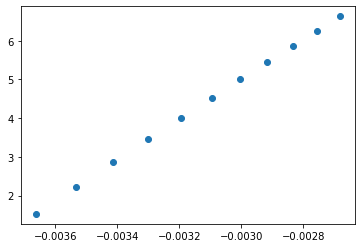

In [7]:
X = vapor["temp"].transform(lambda x: (-1)/x)
y = vapor["vapor"].transform(np.log)#.transform(lambda x: -x)

plt.scatter(X,y)
plt.show()

A value of 1.0 for Rsq and Rsq adj ain't bad.

In [8]:
X = pd.DataFrame(X)
X["const"] = 1
model = sm.OLS(y,X).fit()
model.summary()

/Users/Fr333y3d3a/miniconda3/envs/math839/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  vapor   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.672e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           9.95e-19
Time:                        23:06:37   Log-Likelihood:                 28.164
No. Observations:                  11   AIC:                            -52.33
Df Residuals:                       9   BIC:                            -51.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp        5200.7618     20.135    258.293      0.000    5155.213    5246.311
const         20.6074      0.063    325.790      0.000      20.464      20.750
==============================================================================
Omnibus:                        1.633   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.041
Skew:                          -0.483   Prob(JB):                        0.594
Kurtosis:                       1.843   Cond. No.                     3.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It's interesting to see a parabolic pattern remain in the residual by predicted plot. I suppose that comes not from sampling error, but from the equation's proportionality term. It's not a perfect description of the physical system, but it is a very useful model.

Text(0.5, 1.0, 'Actual by Predicted')

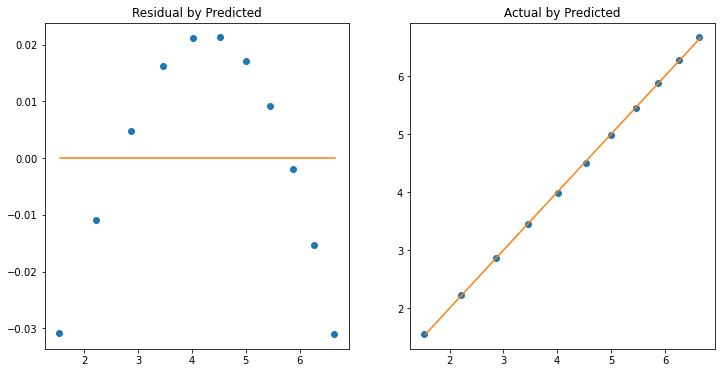

In [9]:
#Residuals and predicted values
resid = model.resid
pred = model.predict(X)

#These four lines describe two functions for displaying the fitted lines on the plots. 
coef_res = np.polyfit(pred,resid,1)
poly1d_res = np.poly1d(coef_res)

coef_act = np.polyfit(pred,y,1)
poly1d_act = np.poly1d(coef_act)

#Matplotlib arranges things using a figure and subplots. Here is a figure with two subplots. 
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(y,resid,"o",label="data")
axs[0].plot(pred,poly1d_res(pred))
axs[0].set_title("Residual by Predicted")

axs[1].plot(y,pred,"o",label="data")
axs[1].plot(pred,poly1d_act(pred))
axs[1].set_title("Actual by Predicted")

Problem 2a. Fit straight line regression model. Perform standard tests for adequacy.

Similar to the previous problem, we'll read in the data, add a constant term, and separate out the variables before fitting the initial model.

In [10]:
glass = pd.read_csv("/Users/Fr333y3d3a/Documents/School/952986478/MATH839 Applied Regression Analysis/hw5/Hwk5Prob2.csv")
glass["const"] = 1

X = glass.loc[:,["weeks","const"]]
y = glass.loc[:,"defects"]

model = sm.OLS(y,X).fit()
model.summary()


/Users/Fr333y3d3a/miniconda3/envs/math839/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                defects   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     70.09
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           2.35e-06
Time:                        23:06:39   Log-Likelihood:                -54.813
No. Observations:                  14   AIC:                             113.6
Df Residuals:                      12   BIC:                             114.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weeks          7.2767      0.869      8.372      0.000       5.383       9.170
const        -31.6982      9.776     -3.243      0.007     -52.998     -10.399
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.153
Skew:                          -0.095   Prob(JB):                        0.926
Kurtosis:                       2.524   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We seem to have gotten nonlinear data, just like the last problem. This time, the data's noisier.

The correlation statistics aren't bad, but we can make a better model. 

Text(0.5, 1.0, 'Actual by Predicted')

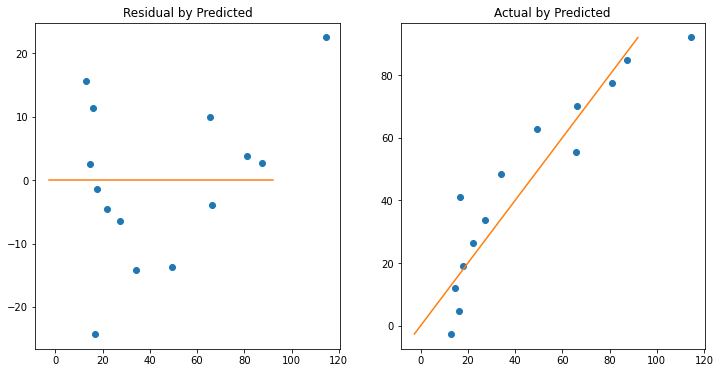

In [11]:
#Residuals and predicted values
resid = model.resid
pred = model.predict(X)

#These four lines describe two functions for displaying the fitted lines on the plots. 
coef_res = np.polyfit(pred,resid,1)
poly1d_res = np.poly1d(coef_res)

coef_act = np.polyfit(pred,y,1)
poly1d_act = np.poly1d(coef_act)

#Matplotlib arranges things using a figure and subplots. Here is a figure with two subplots. 
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(y,resid,"o",label="data")
axs[0].plot(pred,poly1d_res(pred))
axs[0].set_title("Residual by Predicted")

axs[1].plot(y,pred,"o",label="data")
axs[1].plot(pred,poly1d_act(pred))
axs[1].set_title("Actual by Predicted")

2b.

I tried a few different transformations and came to the conclusion that taking the square root and natural log of the predicted variables led to the best results.

This conclusion was based both on the noisy linearity of the residual plots and the maximized Rsq and Rsq adj values.

In [12]:
X = glass.loc[:,["weeks","const"]]
y = glass.loc[:,"defects"]
y = y.transform(np.log).transform(lambda x:x**(1/2))
model = sm.OLS(y,X).fit()
model.summary()

/Users/Fr333y3d3a/miniconda3/envs/math839/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                defects   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           9.08e-08
Time:                        23:06:42   Log-Likelihood:                 20.298
No. Observations:                  14   AIC:                            -36.60
Df Residuals:                      12   BIC:                            -35.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weeks          0.0461      0.004     11.338      0.000       0.037       0.055
const          1.3870      0.046     30.334      0.000       1.287       1.487
==============================================================================
Omnibus:                       13.782   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.986
Skew:                          -1.348   Prob(JB):                      0.00411
Kurtosis:                       6.401   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual by Predicted')

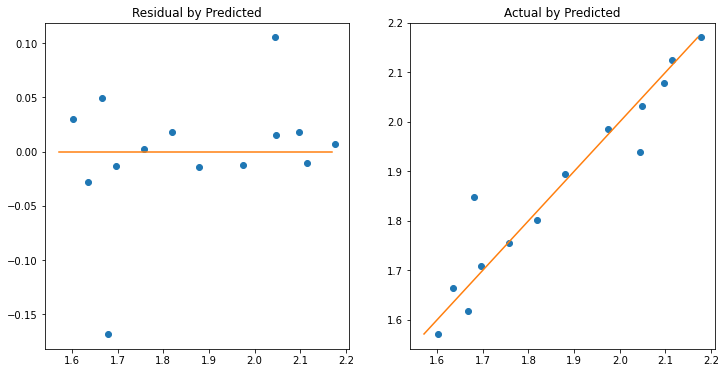

In [13]:
#Residuals and predicted values
resid = model.resid
pred = model.predict(X)

#These four lines describe two functions for displaying the fitted lines on the plots. 
coef_res = np.polyfit(pred,resid,1)
poly1d_res = np.poly1d(coef_res)

coef_act = np.polyfit(pred,y,1)
poly1d_act = np.poly1d(coef_act)

#Matplotlib arranges things using a figure and subplots. Here is a figure with two subplots. 
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(y,resid,"o",label="data")
axs[0].plot(pred,poly1d_res(pred))
axs[0].set_title("Residual by Predicted")

axs[1].plot(y,pred,"o",label="data")
axs[1].plot(pred,poly1d_act(pred))
axs[1].set_title("Actual by Predicted")

Problem 3a. Fit an appropriate multivariate model and conduct the residual analysis.

This data is more complex than the previous two problems. I printed the entire dataset instead of just using the head method for that reason.

In [14]:
taguchi = pd.read_csv("/Users/Fr333y3d3a/Documents/School/952986478/MATH839 Applied Regression Analysis/hw5/Hwk5Prob3.csv")
taguchi["const"] = 1
print(taguchi)

    x1  x2  x3  yi1  yi2   yi3       ybar_i     si  const
0   -1  -1  -1   34   10    28    24.000000   12.5      1
1    0  -1  -1  115  116   130   120.333333    8.4      1
2    1  -1  -1  192  186   263   213.666667   42.8      1
3   -1   0  -1   82   88    88    86.000000    3.7      1
4    0   0  -1   44  178   188   136.666667   80.4      1
5    1   0  -1  322  350   350   340.666667   16.2      1
6   -1   1  -1  141  110    86   112.333333   27.6      1
7    0   1  -1  259  251   259   256.333333    4.6      1
8    1   1  -1  290  280   245   271.666667   23.6      1
9   -1  -1   0   81   81    81    81.000000    0.0      1
10   0  -1   0   90  122    93   101.666667   17.7      1
11   1  -1   0  319  376   376   357.000000   32.9      1
12  -1   0   0  180  180   154   171.333333   15.0      1
13   0   0   0  372  372   372   372.000000    0.0      1
14   1   0   0  541  568   396   501.666667   92.5      1
15  -1   1   0  288  192   312   264.000000   63.5      1
16   0   1   0

We need to do a bit of wrangling in order to get this data the way we want it.

In [15]:
#We'll first pull out the columns we want to analyze
X_wide = taguchi.loc[:,["x1","x2","x3","yi1","yi2","yi3","const","si"]]

#This pandas function is one of a few that can do different versions of stacking.
#This one was ideal because of the serialized ys.
X = pd.wide_to_long(X_wide,["yi"],i=["x1","x2","x3"],j="y_number")

#The funciton creates a multiindex, which we want to turn back into columns.
X = X.reset_index()

#We'll put the sample std devs aside for use in a varianced-based weighting later.
w = X.loc[:,"si"]

#Predicted
y = X.loc[:,"yi"]

#Making the X dataframe be just the regressors
X = X.drop(["si","yi"],axis=1)

#Instead of keeping the numerals resulting from each y column the way they are, 
#we'll subtract 2 from each to give them the same range as our x variables.
X["y_number"] = X["y_number"].transform(lambda x:x-2)
print(X)



    x1  x2  x3  y_number  const
0   -1  -1  -1        -1      1
1   -1  -1  -1         0      1
2   -1  -1  -1         1      1
3    0  -1  -1        -1      1
4    0  -1  -1         0      1
..  ..  ..  ..       ...    ...
76   0   1   1         0      1
77   0   1   1         1      1
78   1   1   1        -1      1
79   1   1   1         0      1
80   1   1   1         1      1

[81 rows x 5 columns]


The model could be better. The Rsq value isn't too high, and the difference with the Rsq adj value implies that there might be some covariance there. 

Including the y number doesn't appear to be very helpful to the model, given its p value and t-test confidence interval.

The nonlinearity of the residuals implies either covariance that we need to control for or a potential nonlinear relationship.

In [16]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yi   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     61.46
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.54e-23
Time:                        23:06:46   Log-Likelihood:                -496.96
No. Observations:                  81   AIC:                             1004.
Df Residuals:                      76   BIC:                             1016.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           177.0000     15.700     11.274      0.000     145.730     208.270
x2           109.4259     15.700      6.970      0.000      78.156     140.696
x3           131.4630     15.700      8.373      0.000     100.193     162.733
y_number      -4.1481     15.700     -0.264      0.792     -35.418      27.122
const        314.6667     12.819     24.547      0.000     289.135     340.198
==============================================================================
Omnibus:                       10.801   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.531
Skew:                           0.579   Prob(JB):                     0.000699
Kurtosis:                       4.722   Cond. No.                         1.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual by Predicted')

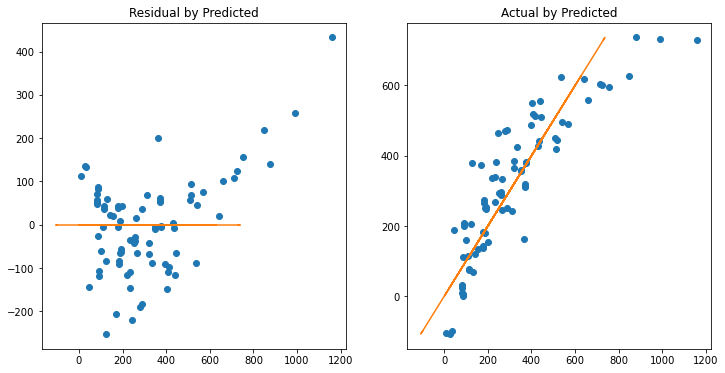

In [17]:
#Residuals and predicted values
resid = model.resid
pred = model.predict(X)

#These four lines describe two functions for displaying the fitted lines on the plots. 
coef_res = np.polyfit(pred,resid,1)
poly1d_res = np.poly1d(coef_res)

coef_act = np.polyfit(pred,y,1)
poly1d_act = np.poly1d(coef_act)

#Matplotlib arranges things using a figure and subplots. Here is a figure with two subplots. 
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(y,resid,"o",label="data")
axs[0].plot(pred,poly1d_res(pred))
axs[0].set_title("Residual by Predicted")

axs[1].plot(y,pred,"o",label="data")
axs[1].plot(pred,poly1d_act(pred))
axs[1].set_title("Actual by Predicted")

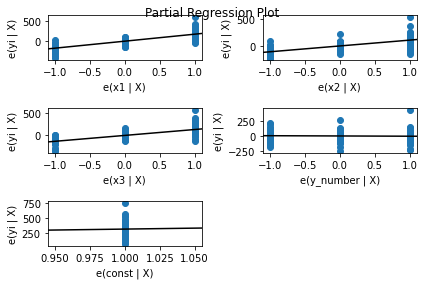

In [18]:
#This partial regression plot provides another way to show how useless the y_number olumn is.
fig = sm.graphics.plot_partregress_grid(model)


3b. Let's see what we can get when we use the std devs in order to weight our model. 

Woah! That bumped our Rsq values right up! It appears giving the values which vary the most greater influence may give models more predictive power. 

Let's see what the residuals look like. 

In [19]:
model = sm.OLS(y,X,weights=w).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yi   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5770.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.60e-93
Time:                        23:06:50   Log-Likelihood:                -496.96
No. Observations:                  81   AIC:                             1004.
Df Residuals:                      76   BIC:                             1016.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           177.0000     15.700     11.274      0.000     145.730     208.270
x2           109.4259     15.700      6.970      0.000      78.156     140.696
x3           131.4630     15.700      8.373      0.000     100.193     162.733
y_number      -4.1481     15.700     -0.264      0.792     -35.418      27.122
const        314.6667     12.819     24.547      0.000     289.135     340.198
==============================================================================
Omnibus:                       10.801   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.531
Skew:                           0.579   Prob(JB):                     0.000699
Kurtosis:                       4.722   Cond. No.                         1.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We're still essentially the same with those residuals. It appears that with categorical data, for now, we haven't too many options. 